In [1]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util
from src.linear_model import LinearModel

In [2]:
ds1_train_path = 'data/ds1_train.csv'
ds1_valid_path = 'data/ds1_valid.csv'
ds2_train_path = 'data/ds2_train.csv'
ds2_valid_path = 'data/ds2_valid.csv'

x_train, y_train = util.load_dataset(ds1_train_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds1_valid_path, add_intercept=True)

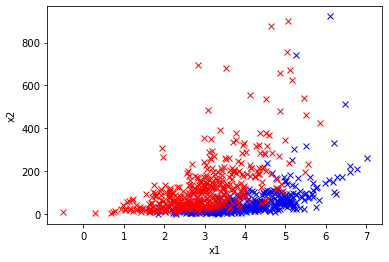

In [3]:
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx')
plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], 'rx')

In [4]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """

        def h(theta, x):
            return 1 / (1 + np.exp(- np.dot(x, theta)))

        def gradient(theta, x, y):
            m, _ = x.shape
            return -1/m * np.dot(x.T, (y - h(theta, x)))

        def hassian(theta, x):
            m, _ = x.shape
            h_theta_x = np.reshape(h(theta, x), (-1, 1))
            return 1/m * (np.dot(x.T, h_theta_x * (1 - h_theta_x) * x))

        def next_theta(theta, x, y):
            return theta - np.dot(np.linalg.inv(hassian(theta, x)), gradient(theta, x, y))

        m, n = x.shape
        if self.theta is None: 
            self.theta = np.zeros(n)

        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)
        self.theta = new_theta

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        return x @ self.theta >= 0  # Question Here !!!

In [5]:
logistic_regression1 = LogisticRegression()
logistic_regression1.fit(x_train, y_train)

Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on training set is:  0.8825


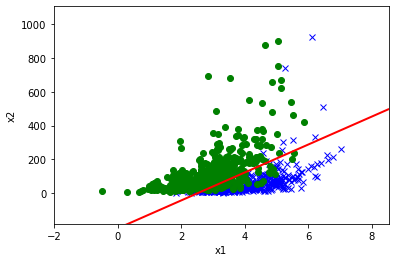

In [7]:
print("Theta is: ", logistic_regression1.theta)
print("The accuracy on training set is: ", np.mean(logistic_regression1.predict(x_train) == y_train))
util.plot(x_train, y_train, theta=logistic_regression1.theta)

The accuracy on validation set is:  0.9


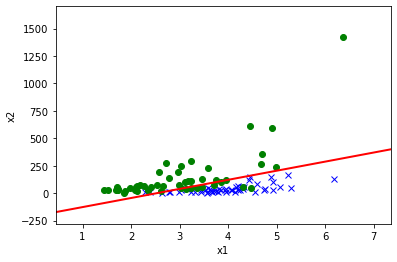

In [8]:
util.plot(x_valid, y_valid, logistic_regression1.theta)
print("The accuracy on validation set is: ", np.mean(logistic_regression1.predict(x_valid) == y_valid))

Theta is:  [ 2.38425454  3.6371206  -3.81234337]
The accuracy on training set is:  0.915
The accuracy on validation set is:  0.91


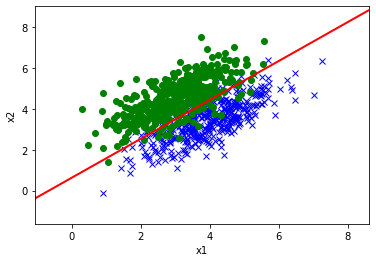

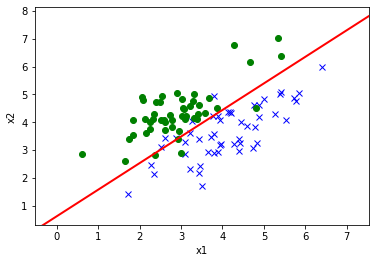

In [11]:
logistic_regression2 = LogisticRegression()
x2_train, y2_train = util.load_dataset(ds2_train_path, add_intercept=True)
x2_valid, y2_valid = util.load_dataset(ds2_valid_path, add_intercept=True)
logistic_regression2.fit(x2_train, y2_train)

print("Theta is: ", logistic_regression2.theta)
print("The accuracy on training set is: ", np.mean(logistic_regression2.predict(x2_train) == y2_train))
util.plot(x2_train, y2_train, theta=logistic_regression2.theta)

util.plot(x2_valid, y2_valid, logistic_regression2.theta)
print("The accuracy on validation set is: ", np.mean(logistic_regression2.predict(x2_valid) == y2_valid))